<h1><b>Star Type Classification / NASA</b></h1>
<h2>Created by Krystian Kopaniarz & Patryk Kubiak</h2>

We are going to peform data analysis on star type classification dataset.

<b>DATA DEFINITON</b><br>
<b>Temperature</b> - Temperature of the star, expressed in degrees of Kelvin: K<br>
<b>L</b> - Relative luminosity, expressed in terms of nominal solar luminosity: (L/Lo)<br>
<b>R</b> - Relative radius, expressed in terms of nominal solar radius: (R/Ro)<br>
<b>A_M</b> - Absolute magnitude, expressed in: (Mv)<br>
<b>Color</b> - Observable color of the star<br>
<b>Spectral_Class</b> - Spectral class of the star, classified under the Morgan–Keenan (MK) system<br>
<b>Type</b> - Type of the star:<br>
<ul>
    <li>Red Dwarf - 0</li>
    <li>Brown Dwarf - 1</li>
    <li>White Dwarf - 2</li>
    <li>Main Sequence - 3</li>
    <li>Super Giant - 4</li>
    <li>Hyper Giant - 5</li>
</ul>
<br>
<b>MATH</b><br>
Lo = 3.828 x 10^26 Watts (Avg Luminosity of Sun)<br>
Ro = 6.9551 x 10^8 m (Avg Radius of Sun)</br>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

<h2>Data import and basic data information</h2>

In [3]:
df = pd.read_csv('stars-data.csv')
df

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Blue,O,5
236,30839,834042.000000,1194.0000,-10.63,Blue,O,5
237,8829,537493.000000,1423.0000,-10.73,White,A,5
238,9235,404940.000000,1112.0000,-11.23,White,A,5


In [4]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   L               240 non-null    float64
 2   R               240 non-null    float64
 3   A_M             240 non-null    float64
 4   Color           240 non-null    object 
 5   Spectral_Class  240 non-null    object 
 6   Type            240 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


(240, 7)

In [78]:
df.describe()

,Temperature,L,R,A_M,Type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


This dataset contains 240 records, 7 columns and no null values.

<h2>Data quality and data transformation</h2>

In [5]:
df['Color'].unique()

array(['Red', 'Blue White', 'White', 'Yellowish White', 'Blue white',
       'Pale yellow orange', 'Blue', 'Blue-white', 'Whitish',
       'yellow-white', 'Orange', 'White-Yellow', 'white', 'yellowish',
       'Yellowish', 'Orange-Red', 'Blue-White'], dtype=object)

Value quality in Color column is poor. We have very similar values, i.e. "Whitish" and "white" that requires a correction. Before we start data visualisation, we have to make sure that this column is normalized.

In [7]:
df['Color'].loc[df['Color'] == 'Blue-white'] = 'Blue-White'
df['Color'].loc[df['Color'] == 'Blue White'] = 'Blue-White'
df['Color'].loc[df['Color'] == 'Blue white'] = 'Blue-White'
df['Color'].loc[df['Color'] == 'yellow-white'] = 'White-Yellow'
df['Color'].loc[df['Color'] == 'Yellowish White'] = 'White-Yellow'
df['Color'].loc[df['Color'] == 'white'] = 'White'
df['Color'].loc[df['Color'] == 'yellowish'] = 'Yellowish'

df['Color'].unique()

array(['Red', 'Blue-White', 'White', 'White-Yellow', 'Pale yellow orange',
       'Blue', 'Whitish', 'Orange', 'Yellowish', 'Orange-Red'],
      dtype=object)

We reduced amount of colors from 17 to 10.

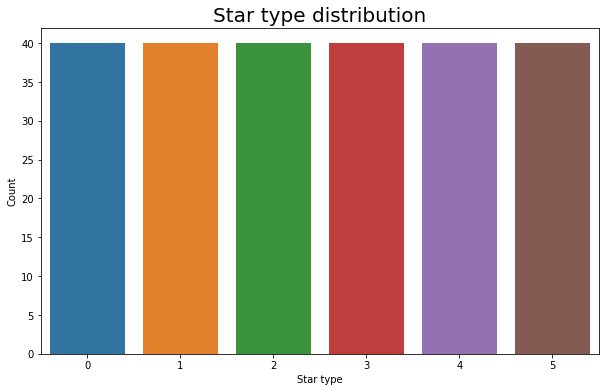

In [8]:
plt.figure(figsize = (10, 6))
sns.countplot(x = 'Type', data = df)
plt.title('Star type distribution', fontsize = 20)
plt.xlabel('Star type')
plt.ylabel('Count')
plt.show()

This dataset contains 6 star types with equal count of 40 in each of them.

<h2>Data analysis and visualization</h2>

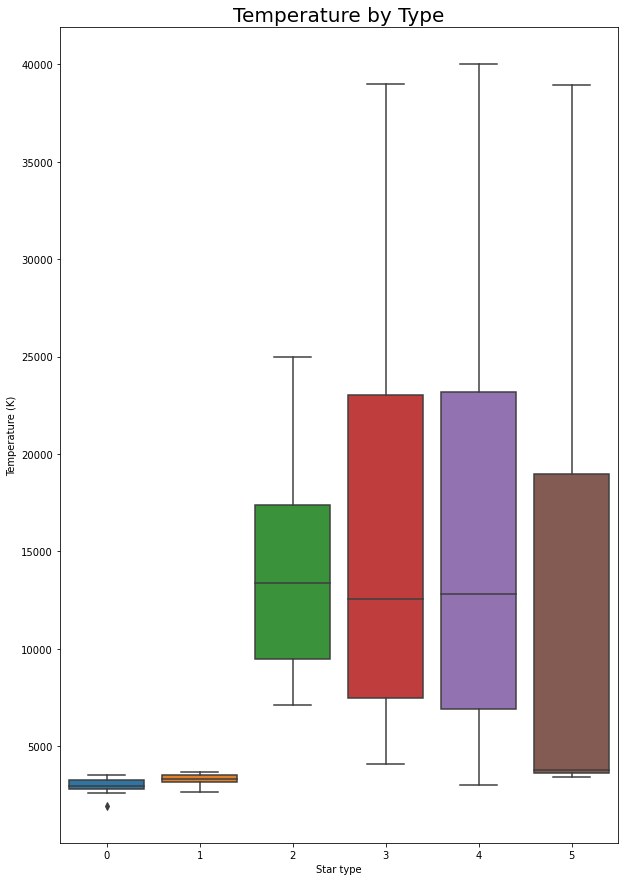

In [55]:
plt.figure(figsize = (10, 15))
sns.boxplot(x = df['Type'], y = df['Temperature'])
plt.title('Temperature by Type', fontsize = 20)
plt.xlabel('Star type')
plt.ylabel('Temperature (K)')
plt.show()

We can notice that the coldest of stars are White and Brown Dwarfs (Type 0 and 1). The hottest extreme temperature goes to Super Giants (Type 4). Main Sequence (Type3) and Super Giants have the hottest median across all of the dataset.

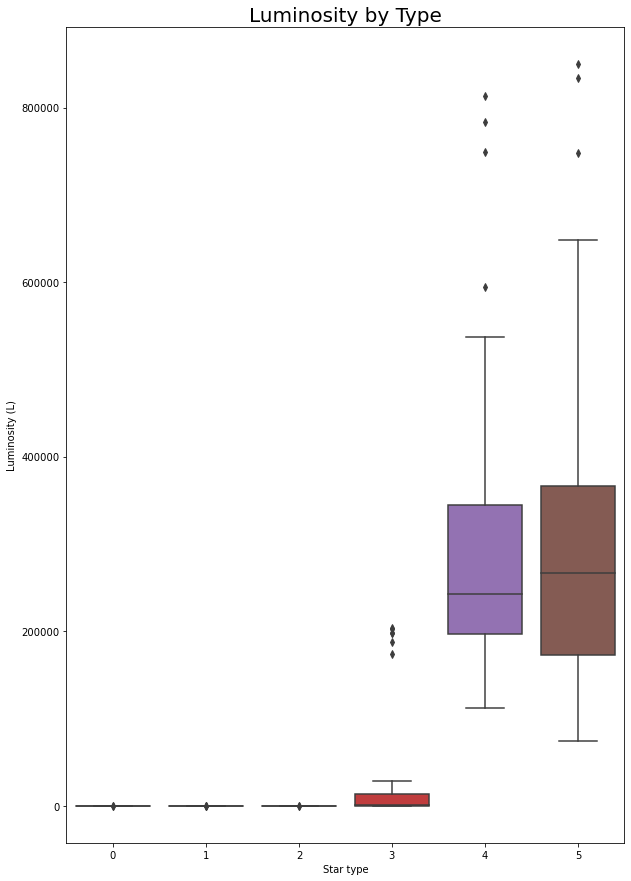

In [24]:
plt.figure(figsize = (10, 15))
sns.boxplot(x = df['Type'], y = df['L'])
plt.title('Luminosity by Type', fontsize = 20)
plt.xlabel('Star type')
plt.ylabel('Luminosity (L)')
plt.show()

There's dependency in dwarfs - they emit little to no light at all. The brighest stars are the largest ones - Hyper Giants.

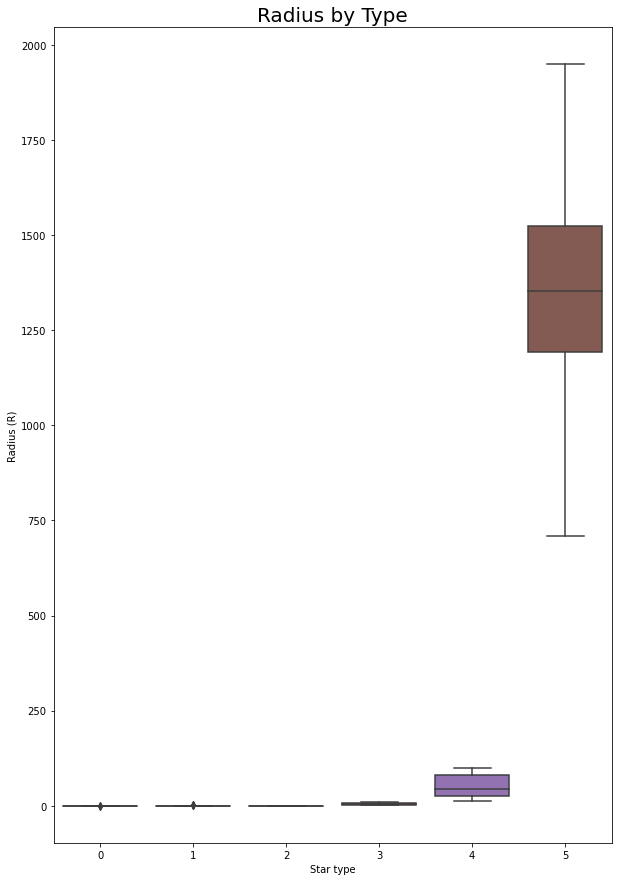

In [25]:
plt.figure(figsize = (10, 15))
sns.boxplot(x = df['Type'], y = df['R'])
plt.title('Radius by Type', fontsize = 20)
plt.xlabel('Star type')
plt.ylabel('Radius (R)')
plt.show()

There's huge different between Hyper Giants and the rest of the stars. The biggest Super Giants are reaching out to ~50R while Hyper Giants starts from ~700R.

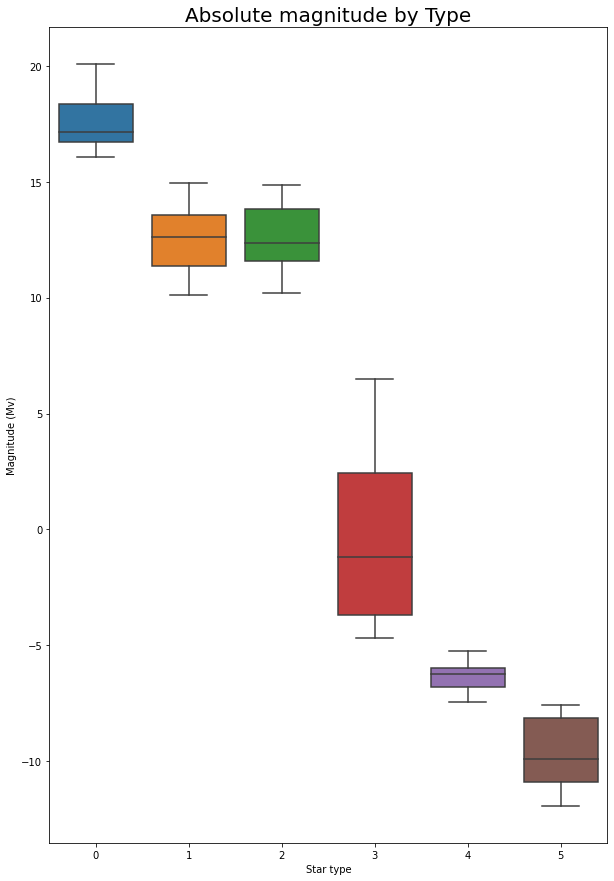

In [26]:
plt.figure(figsize = (10, 15))
sns.boxplot(x = df['Type'], y = df['A_M'])
plt.title('Absolute magnitude by Type', fontsize = 20)
plt.xlabel('Star type')
plt.ylabel('Magnitude (Mv)')
plt.show()

Sun's magnitude is equal to 4.83 - . Magnitude is based of distance of 10 parsecs from Earth. If we would put any giants 10 parsecs away from an Earth, it would overtake the entire sky due to it's size.

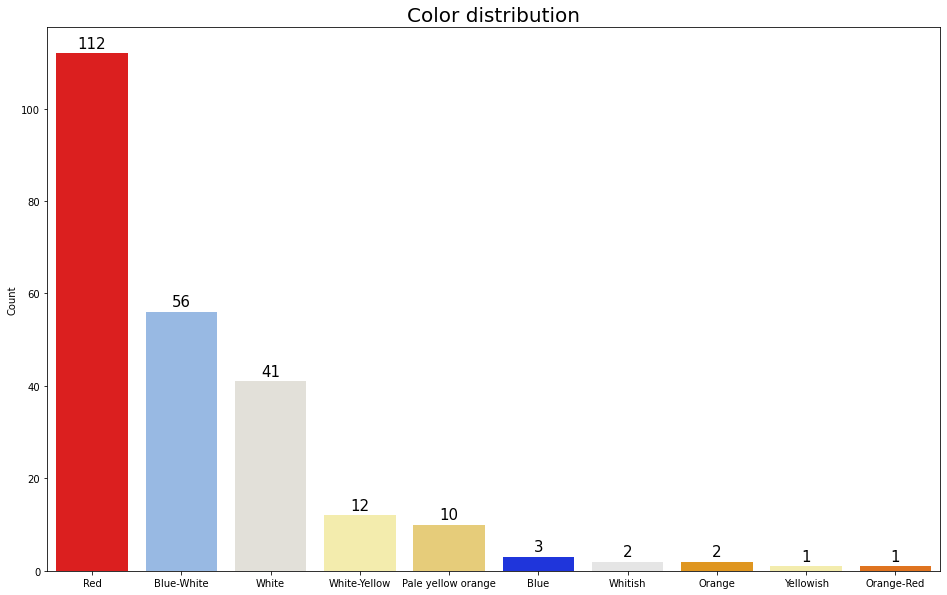

In [76]:
palette = {'Red': '#fa0000', 'Blue-White': '#8bb7f0', 'White': '#e3e1d8', 'White-Yellow': '#fff6a1',
           'Pale yellow orange': '#f8d568', 'Blue': '#001dfa', 'Whitish': '#e5e5e5', 'Orange': '#ff9d00',
           'Yellowish': '#fff6a1', 'Orange-Red': '#ff6f00'}
plt.figure(figsize = (16, 10))
splot = sns.barplot(x = df['Color'].unique(), y = df['Color'].value_counts(), palette = palette)
plt.title('Color distribution', fontsize = 20)
plt.ylabel('Count')
for p in splot.patches:
    splot.annotate(format(round(p.get_height())), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, 10), 
                   textcoords = 'offset points')
plt.show()

Dominant color is red, followed by blue-white and white colors. The least occuring colors are yellowish and orange-red.